In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("data/raw_data.csv")

In [ ]:
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [10]:
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


In [11]:
df.isnull().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [12]:
print(f"Duplicados: {df.duplicated().sum()}")

Duplicados: 0


In [13]:
total_transacciones = df.shape[0]
print(f"Número total de transacciones: {total_transacciones}")

Número total de transacciones: 200000


In [14]:
num_fraude = df['Is_Fraud'].sum()
print(f"Transacciones fraudulentas: {num_fraude} ({num_fraude/total_transacciones:.2%})")


Transacciones fraudulentas: 10088 (5.04%)


In [21]:
df['Is_Fraud'].unique()

array([0, 1])

In [15]:
transacciones_tipo = df['Transaction_Type'].value_counts()
print(transacciones_tipo)

Transaction_Type
Credit          40180
Debit           40050
Bill Payment    40040
Transfer        39953
Withdrawal      39777
Name: count, dtype: int64


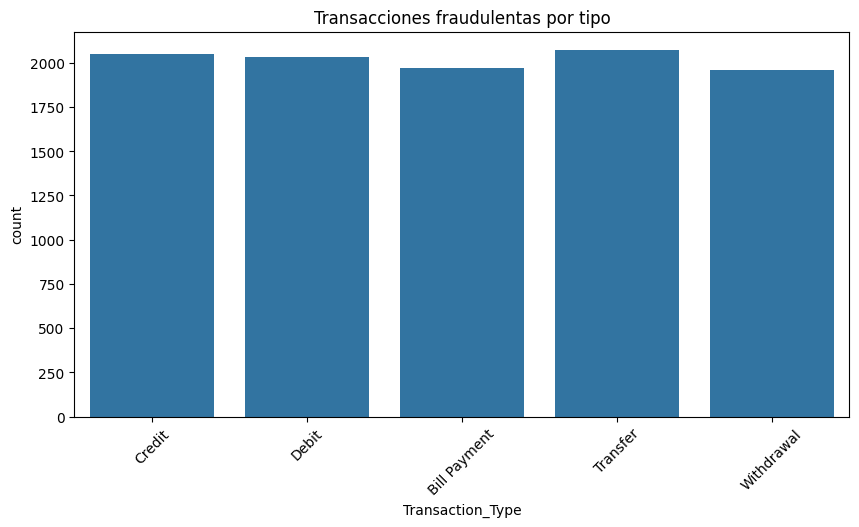

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Is_Fraud'] == 1], x="Transaction_Type", order=transacciones_tipo.index)
plt.title("Transacciones fraudulentas por tipo")
plt.xticks(rotation=45)
plt.show()

In [5]:
# Ver valores de Merchant_ID
df['Merchant_ID'].value_counts()

Merchant_ID
7bd06101-ef33-4e48-9ce2-dc823f10f173    1
cb9b72d2-27d0-4e1f-aa5c-eeb3df502b76    1
d832fbed-3740-4596-896e-70b3ce2fefad    1
faa97357-248b-45b7-9819-188a5d9367d1    1
37378ecd-19e6-437e-adb4-ed699c155f86    1
                                       ..
70dd77dd-3b00-4b2c-8ebc-cfb8af5f6741    1
f45cd6b3-5092-44d0-8afb-490894605184    1
97977d83-5486-4510-af1c-8dada3e1cfa0    1
f9e3f11f-28d3-4199-b0ca-f225a155ede6    1
214e03c5-5c34-40d1-a66c-f440aa2bbd02    1
Name: count, Length: 200000, dtype: int64

In [8]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [9]:
drop_columns = ['Customer_ID', 'Customer_Name', 'Gender', 'Age',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email']
df.drop(columns=drop_columns, inplace=True)
print(df.columns)

Index(['State', 'City', 'Transaction_Location'], dtype='object')


In [10]:
df.to_csv("data/processed_data.csv", index=False)